In [935]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt

plt.style.use('dark_background')

In [936]:
df = pd.read_csv('bank_data_clean_v2.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,no,0.628208,yes,no,cellular,0.133333,may,0.505508,0.0,0.0,0.0,failure,no
1,0.337662,technician,single,secondary,no,0.281055,yes,no,telephone,0.133333,may,0.291939,0.0,0.0,0.0,success,no
2,0.194805,entrepreneur,married,secondary,no,0.276621,yes,yes,cellular,0.133333,may,0.146323,0.0,0.0,0.0,success,no
3,0.220779,management,married,tertiary,no,0.314227,yes,no,cellular,0.133333,may,0.268640,0.0,0.0,0.0,success,no
4,0.129870,management,single,tertiary,no,0.349697,yes,yes,cellular,0.133333,may,0.420080,0.0,0.0,0.0,failure,no


In [937]:
df.shape

(43354, 17)

#### Before clustering i'll encode each categorical variable.

In [938]:
categorical_var_names = list(set(df.columns) - set(df.select_dtypes(include=np.number).columns))
categorical_var_names.remove('y')
categorical_var_names

['month',
 'contact',
 'poutcome',
 'loan',
 'default',
 'job',
 'marital',
 'education',
 'housing']

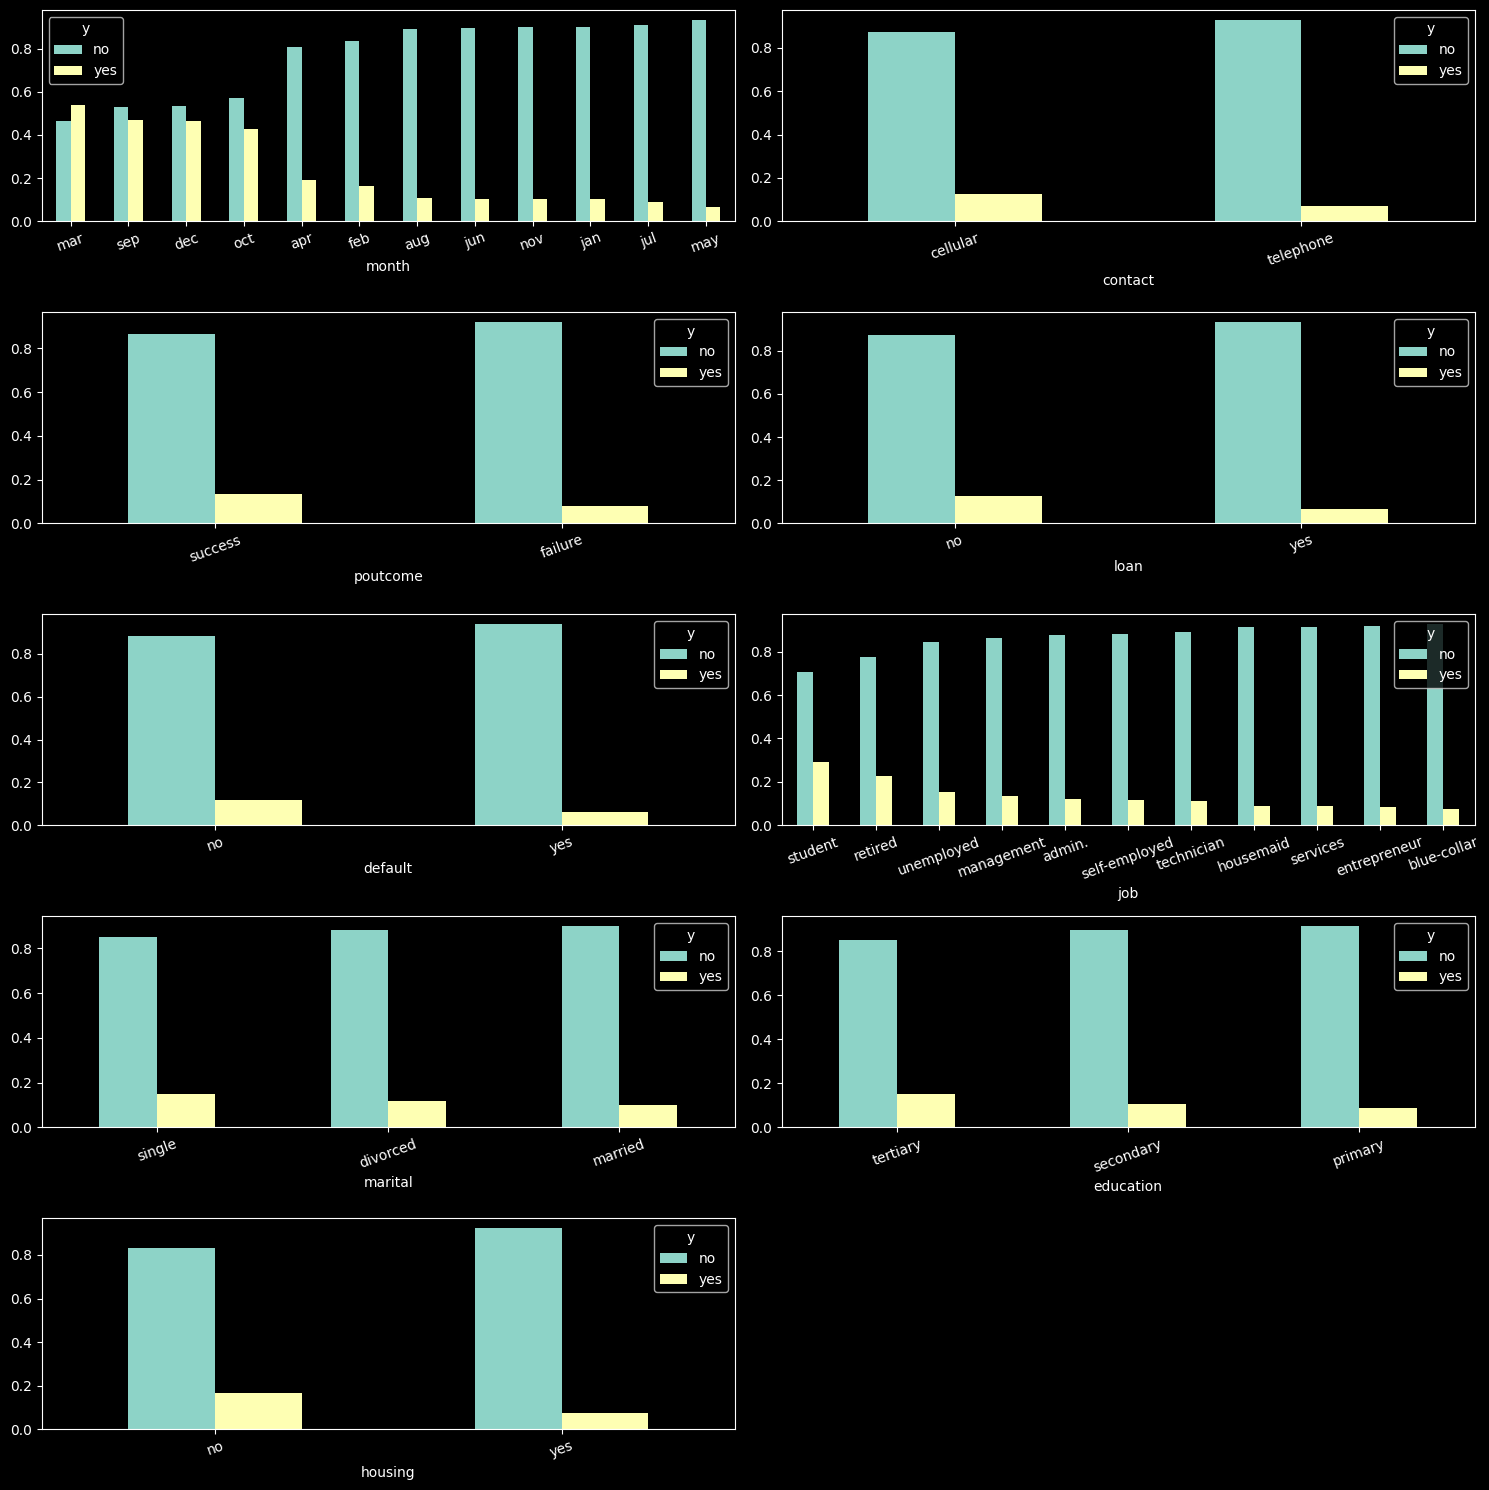

In [939]:
crosstabs = [     
    (pd.crosstab(index=df.get(var_name), columns=df['y'], normalize='index').sort_values('yes', ascending=False), var_name) for var_name in categorical_var_names 
]

fig, ax = plt.subplots(5, 2, figsize=(15, 15), tight_layout=True)

plt.subplots_adjust(bottom=0.01, wspace=0.5)
fig.tight_layout(pad=5)

for crosstab, ax_i in zip(crosstabs, ax.flatten()):
    crosstab[0].plot.bar(ax=ax_i, rot=20)

fig.delaxes(ax[4][1])
plt.savefig('cat_order.png')

In [940]:
for crosstab in crosstabs:
    print(crosstab[1])

month
contact
poutcome
loan
default
job
marital
education
housing


In [941]:
mappings = dict()

for crosstab in crosstabs:
    
    mappings[crosstab[1]] = dict()
    values = list(crosstab[0].index)
    
    for i, value in enumerate(values):
        mappings[crosstab[1]][value] = len(values) -1 - i

mappings

{'month': {'mar': 11,
  'sep': 10,
  'dec': 9,
  'oct': 8,
  'apr': 7,
  'feb': 6,
  'aug': 5,
  'jun': 4,
  'nov': 3,
  'jan': 2,
  'jul': 1,
  'may': 0},
 'contact': {'cellular': 1, 'telephone': 0},
 'poutcome': {'success': 1, 'failure': 0},
 'loan': {'no': 1, 'yes': 0},
 'default': {'no': 1, 'yes': 0},
 'job': {'student': 10,
  'retired': 9,
  'unemployed': 8,
  'management': 7,
  'admin.': 6,
  'self-employed': 5,
  'technician': 4,
  'housemaid': 3,
  'services': 2,
  'entrepreneur': 1,
  'blue-collar': 0},
 'marital': {'single': 2, 'divorced': 1, 'married': 0},
 'education': {'tertiary': 2, 'secondary': 1, 'primary': 0},
 'housing': {'no': 1, 'yes': 0}}

In [942]:
for var_name in categorical_var_names:
    df[var_name] = df[var_name].map(mappings[var_name])
    
df['y'] = df.y.map({'no': 0, 'yes': 1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,7,0,2,1,0.628208,0,1,1,0.133333,0,0.505508,0.0,0.0,0.0,0,0
1,0.337662,4,2,1,1,0.281055,0,1,0,0.133333,0,0.291939,0.0,0.0,0.0,1,0
2,0.194805,1,0,1,1,0.276621,0,0,1,0.133333,0,0.146323,0.0,0.0,0.0,1,0
3,0.220779,7,0,2,1,0.314227,0,1,1,0.133333,0,0.268640,0.0,0.0,0.0,1,0
4,0.129870,7,2,2,1,0.349697,0,0,1,0.133333,0,0.420080,0.0,0.0,0.0,0,0


#### Encoding the categorical data based on their order w.r.t y

In [943]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[categorical_var_names])
df[categorical_var_names] = scaled
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,0.7,0.0,1.0,1.0,0.628208,0.0,1.0,1.0,0.133333,0.0,0.505508,0.0,0.0,0.0,0.0,0
1,0.337662,0.4,1.0,0.5,1.0,0.281055,0.0,1.0,0.0,0.133333,0.0,0.291939,0.0,0.0,0.0,1.0,0
2,0.194805,0.1,0.0,0.5,1.0,0.276621,0.0,0.0,1.0,0.133333,0.0,0.146323,0.0,0.0,0.0,1.0,0
3,0.220779,0.7,0.0,1.0,1.0,0.314227,0.0,1.0,1.0,0.133333,0.0,0.268640,0.0,0.0,0.0,1.0,0
4,0.129870,0.7,1.0,1.0,1.0,0.349697,0.0,0.0,1.0,0.133333,0.0,0.420080,0.0,0.0,0.0,0.0,0


In [944]:
df.y.value_counts()

0    38317
1     5037
Name: y, dtype: int64

##### I'll up-sample the minority class in y so that the models dont create bias over class 0

In [945]:
from sklearn.utils import resample

df_majority = df[df.y == 0]
df_minority = df[df.y == 1]

df_minority_upsampled = resample(
    df_minority, 
    replace=True, 
    n_samples=len(df_majority),
    random_state=123
)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [946]:
df_upsampled.y.value_counts()

0    38317
1    38317
Name: y, dtype: int64

In [947]:
df = df_upsampled

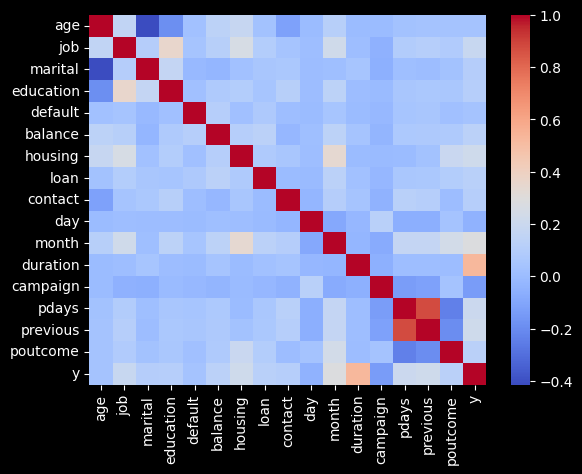

In [948]:
corr_mat = sns.heatmap(df.corr(), cmap='coolwarm')

#### Because the algorithms below are very costly i'll use 20% of the data to speed things up

In [949]:
df.shape

(76634, 17)

In [950]:
df = df.sample(frac=1)  # shuffle df
df = df.sample(frac=0.2, random_state=42, replace=False)
df.shape

(15327, 17)

### Feature Selection

#### Sorting features based on how high their correletion with y is

In [951]:
ix = df.corr().sort_values('y', ascending=False).index
df_sorted = df.loc[:, ix]

num_of_feats = 6

corr_based_feats = list(df_sorted.columns[1:num_of_feats + 1])
corr_based_feats

['duration', 'month', 'previous', 'housing', 'pdays', 'job']

In [952]:
column_stoi = { column_name: i for i, column_name in enumerate(list(df.columns)) }
column_itos = { i: column_name for column_name, i in column_stoi.items() }
column_stoi, column_itos

({'age': 0,
  'job': 1,
  'marital': 2,
  'education': 3,
  'default': 4,
  'balance': 5,
  'housing': 6,
  'loan': 7,
  'contact': 8,
  'day': 9,
  'month': 10,
  'duration': 11,
  'campaign': 12,
  'pdays': 13,
  'previous': 14,
  'poutcome': 15,
  'y': 16},
 {0: 'age',
  1: 'job',
  2: 'marital',
  3: 'education',
  4: 'default',
  5: 'balance',
  6: 'housing',
  7: 'loan',
  8: 'contact',
  9: 'day',
  10: 'month',
  11: 'duration',
  12: 'campaign',
  13: 'pdays',
  14: 'previous',
  15: 'poutcome',
  16: 'y'})

#### Using RFE:

In [953]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

vals = df.values
feats = vals[:, 0:]
labels = vals[:, column_stoi['y']]

model_check = LogisticRegression(solver='lbfgs')

rfe = RFE(estimator=model_check, n_features_to_select=num_of_feats).fit(feats, labels)

rfe_based_feats = sorted([ (i, column_itos[i]) for i in rfe.ranking_ ], reverse=False, key=lambda x:x[0])
rfe_based_feats = [ x[1] for x in list(dict.fromkeys(rfe_based_feats)) ][:num_of_feats]    # removing duplicates

rfe_based_feats

['job', 'marital', 'education', 'default', 'balance', 'housing']

##### RFE chose: job, marital, education, default, balance, housing as the top 6 features

#### Using ExtraTreesClassifier

In [955]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10)
etc.fit(feats, labels)
etc_based_feats = sorted([ (column_itos[i], importance) for i, importance in enumerate(etc.feature_importances_) ], reverse=True, key=lambda x:x[1] )[1:num_of_feats + 1]
etc_based_feats = [ x[0] for x in etc_based_feats ]

etc_based_feats

['duration', 'month', 'pdays', 'housing', 'previous', 'poutcome']

#### ExtraTreesClassifier chose: duration, pdays, housing, month, poutcome, loadn as the top 6 features

#### PCA:

In [956]:
from sklearn.decomposition import PCA

def pca_transform(n_components, X):
    pca = PCA(n_components=n_components)
    X_embed = pca.fit_transform(X)
    return (X_embed, np.sum(pca.explained_variance_ratio_[:n_components]))

In [957]:
X_1, X_2, X_3 = df[corr_based_feats].values, df[rfe_based_feats].values, df[etc_based_feats].values
y = df['y'].values

(X_embed_1, evr_1), (X_embed_2, evr_2), (X_embed_3, evr_3) = pca_transform(5, X_1), pca_transform(5, X_2), pca_transform(5, X_3)

print(evr_1, evr_2, evr_3)

0.9795999888323019 0.9790933859755298 0.9821584758286197


In [958]:
#set(corr_based_feats).intersection(set(rfe_based_feats)).intersection(set(etc_based_feats))

#### We can see that 5 features are enough for ~98% of the variance

#### Because some features from RFE, and ExtraTreesClassifier have reletevely high correletion with each other i'll only use the independant ones, so i'll use X_1 (top 6 based on correlation to target variable y)

In [959]:
X = X_embed_1
X.shape

(15327, 5)

<AxesSubplot:>

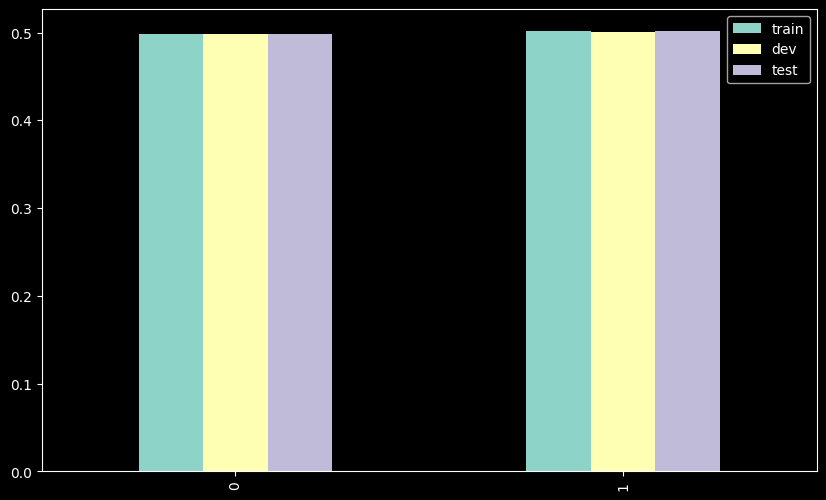

In [960]:
from sklearn.model_selection import train_test_split

ix = list(range(len(X)))
dev_size, test_size = 0.2, 0.1

dev_slice = dev_size + test_size
test_slice = test_size / dev_size

ix_train, ix_dev = train_test_split(ix, test_size=dev_slice, random_state=42, stratify=y)
ix_dev, ix_test = train_test_split(ix_dev, test_size=test_slice, random_state=42, stratify=y[ix_dev])

fig, ax = plt.subplots(1,1, figsize=(10,6))

pd.concat((
    pd.Series(y[ix_train]).value_counts(normalize=True).sort_index().rename('train'),
    pd.Series(y[ix_dev]).value_counts(normalize=True).sort_index().rename('dev'),
    pd.Series(y[ix_test]).value_counts(normalize=True).sort_index().rename('test')
), axis=1).plot.bar(ax=ax)

In [961]:
f'{X.shape=}, {y.shape=}'

'X.shape=(15327, 5), y.shape=(15327,)'

In [962]:
import itertools

combos = [ combo for combo in itertools.combinations(range(X.shape[1]),  2) ]
combos

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

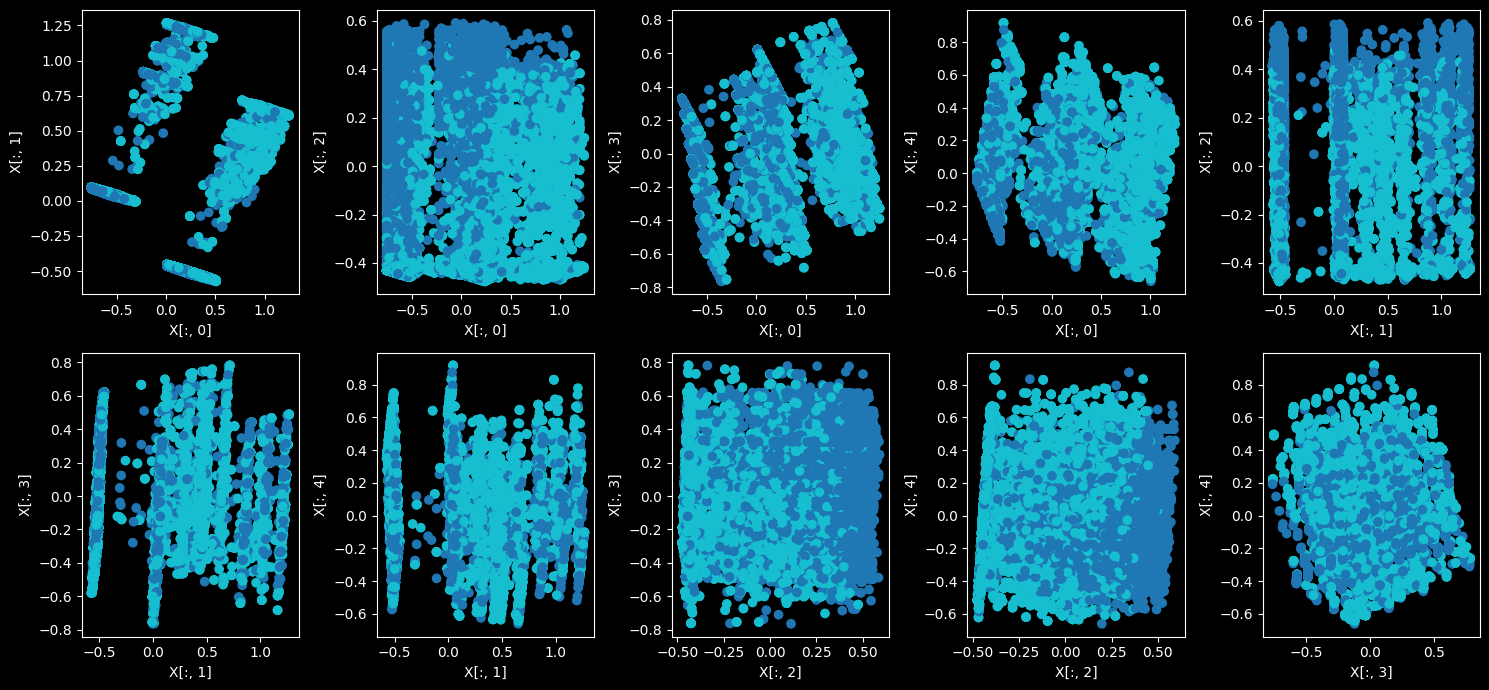

In [963]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

for combo, ax_i in zip(combos, ax.flatten()):
    ax_i.scatter(X[:, combo[0]], X[:, combo[1]], c=y, cmap='tab10')
    ax_i.set_xlabel(f'X[:, {combo[0]}]')
    ax_i.set_ylabel(f'X[:, {combo[1]}]')

plt.savefig('scatter.png')

### K-Means

- ##### Initialization of centeroids method is kmeans++ to save up time
- ##### Distance function is euclidean
- ##### Model is evaluated using silhouette score.
- ##### Algorithm is elkan (because i test different K values and for each value i calculate the silhouette score elkan's use of the triangle inequality saves up a lot of distance between points calculations)

In [964]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

K = range(2, 7)
kmeans_fits, kmeans_hist = [], []

for k in K:
    model = KMeans(n_clusters=k, init='k-means++', algorithm='elkan').fit(X)
    kmeans_fits.append(model)
    kmeans_hist.append( (k, silhouette_score(X, model.labels_, metric='euclidean')) )

In [965]:
kmeans_hist_df = pd.DataFrame(kmeans_hist, columns=['k', 'sil_score'])
kmeans_hist_df = kmeans_hist_df.sort_values('sil_score', ascending=False)
kmeans_hist_df

,k,sil_score
2,4,0.445779
1,3,0.407970
3,5,0.397808
4,6,0.357934
0,2,0.350342


In [966]:
def plot_clusters(ax, model):
    for combo, ax_i in zip(combos, ax.flatten()):
        ax_i.scatter(X[:, combo[0]], X[:, combo[1]], c=model.labels_, cmap='tab10')
        ax_i.set_xlabel(f'X[:, {combo[0]}]')
        ax_i.set_ylabel(f'X[:, {combo[1]}]')

In [967]:
kmeans_fits

[KMeans(algorithm='elkan', n_clusters=2),
 KMeans(algorithm='elkan', n_clusters=3),
 KMeans(algorithm='elkan', n_clusters=4),
 KMeans(algorithm='elkan', n_clusters=5),
 KMeans(algorithm='elkan', n_clusters=6)]

##### 2 clusters:

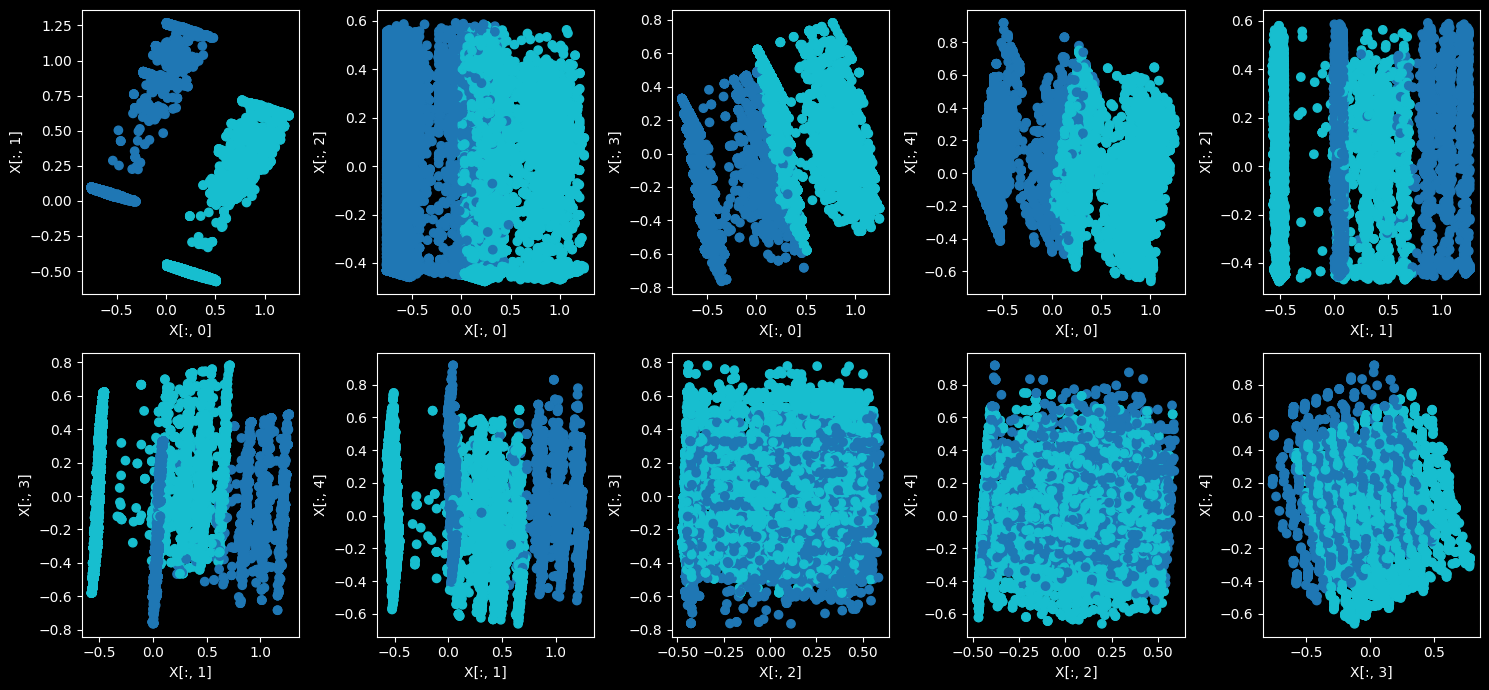

In [968]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

plot_clusters(ax, kmeans_fits[0])
plt.savefig('kmeans_2_clusts.png')

#### 4 clusters:

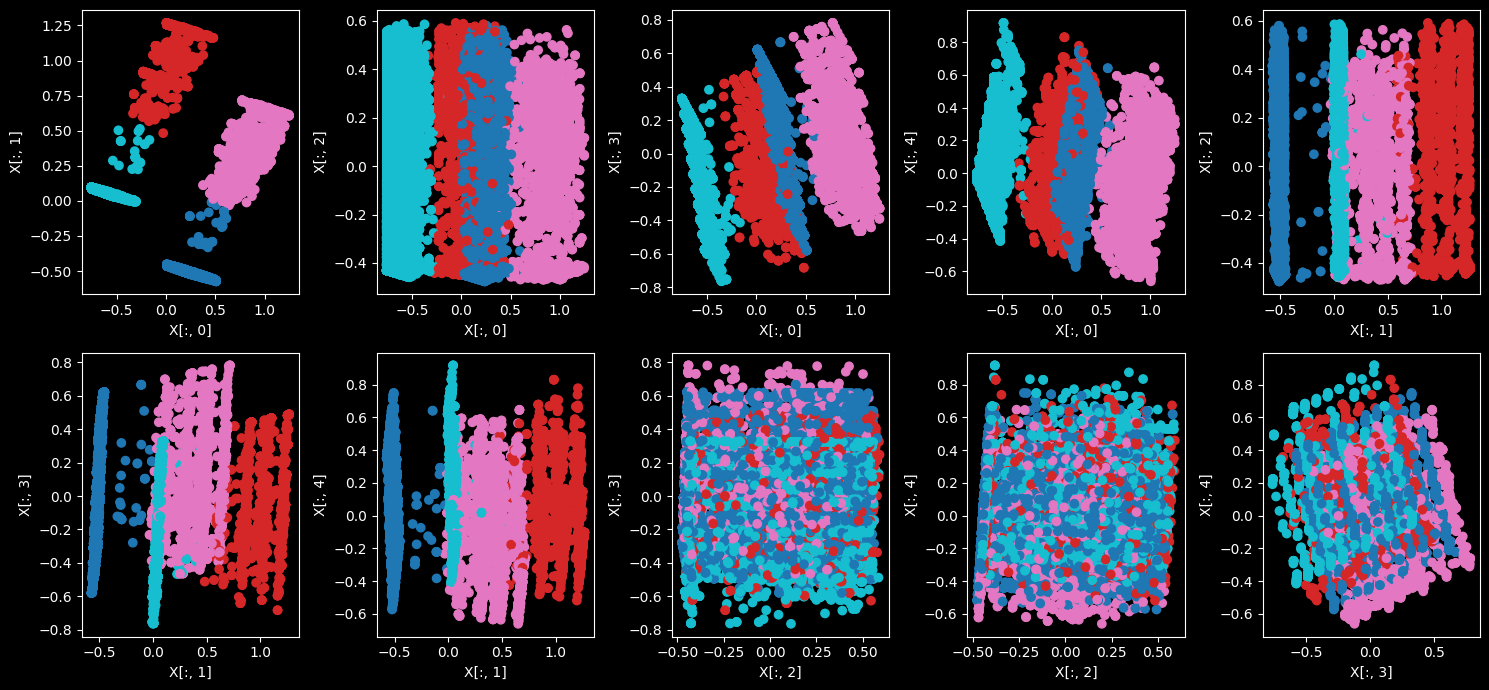

In [969]:
fig, ax = plt.subplots(2, 5, figsize=(15, 7), tight_layout=True)

plot_clusters(ax, kmeans_fits[2])
plt.savefig('kmeans_4_clusts.png')

### DBSCAN

#### DBSCAN parameters:
- ##### for min_samples i'll try values >= to the dimensionality of X
- ##### for eps i'll use NearestNeighbors to find the average distance between each point and its n_neighbors
- ##### n_neighbors will be equal to min_samples

In [971]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.express as px


ngbrs = NearestNeighbors(n_neighbors=20)
ngbrs_fit = ngbrs.fit(X)
neigh_dist, neigh_indices = ngbrs.kneighbors(X)

# sorting distances in ascending order
neigh_dist = np.sort(neigh_dist, axis=0)
neigh_dist = neigh_dist[:,1]

#plt.plot(neigh_dist)   # not accurate enough
px.line(neigh_dist)


In [972]:
from sklearn.cluster import DBSCAN

eps_vals = np.linspace(0.151, 0.5, 5)
min_samples_vals = range(8, 13)

dbscan_fits = []
dbscan_hist = []

for eps in eps_vals:
    for min_samples in min_samples_vals:
        
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        dbscan_fits.append(dbscan_model)
        
        try:
            dbscan_hist.append( (eps, min_samples, silhouette_score(X, dbscan_model.labels_), len(np.unique(dbscan_model.labels_))) )
        except ValueError:      # occurs when dbscan assigns all data points to 1 cluster, silhouette score accepts number of clusters >= 2
            pass

In [973]:
dbscan_hist_df = pd.DataFrame(dbscan_hist, columns=['eps', 'min_samples', 'sil_score', 'clusters_num'])
dbscan_hist_df = dbscan_hist_df.sort_values('sil_score', ascending=False)
dbscan_hist_df.head(10)

,eps,min_samples,sil_score,clusters_num
5,0.23825,8,0.441657,5
8,0.23825,11,0.441234,5
6,0.23825,9,0.441097,5
9,0.23825,12,0.441005,5
7,0.23825,10,0.440365,5
24,0.50000,12,0.350342,2
23,0.50000,11,0.350342,2
22,0.50000,10,0.350342,2
21,0.50000,9,0.350342,2
20,0.50000,8,0.350342,2


In [974]:
dbscan_fits

[DBSCAN(eps=0.151, min_samples=8),
 DBSCAN(eps=0.151, min_samples=9),
 DBSCAN(eps=0.151, min_samples=10),
 DBSCAN(eps=0.151, min_samples=11),
 DBSCAN(eps=0.151, min_samples=12),
 DBSCAN(eps=0.23825, min_samples=8),
 DBSCAN(eps=0.23825, min_samples=9),
 DBSCAN(eps=0.23825, min_samples=10),
 DBSCAN(eps=0.23825, min_samples=11),
 DBSCAN(eps=0.23825, min_samples=12),
 DBSCAN(eps=0.3255, min_samples=8),
 DBSCAN(eps=0.3255, min_samples=9),
 DBSCAN(eps=0.3255, min_samples=10),
 DBSCAN(eps=0.3255, min_samples=11),
 DBSCAN(eps=0.3255, min_samples=12),
 DBSCAN(eps=0.41274999999999995, min_samples=8),
 DBSCAN(eps=0.41274999999999995, min_samples=9),
 DBSCAN(eps=0.41274999999999995, min_samples=10),
 DBSCAN(eps=0.41274999999999995, min_samples=11),
 DBSCAN(eps=0.41274999999999995, min_samples=12),
 DBSCAN(min_samples=8),
 DBSCAN(min_samples=9),
 DBSCAN(min_samples=10),
 DBSCAN(min_samples=11),
 DBSCAN(min_samples=12)]

#### Plotting KMeans vs DBSCAN clusters (first row is KMeans)

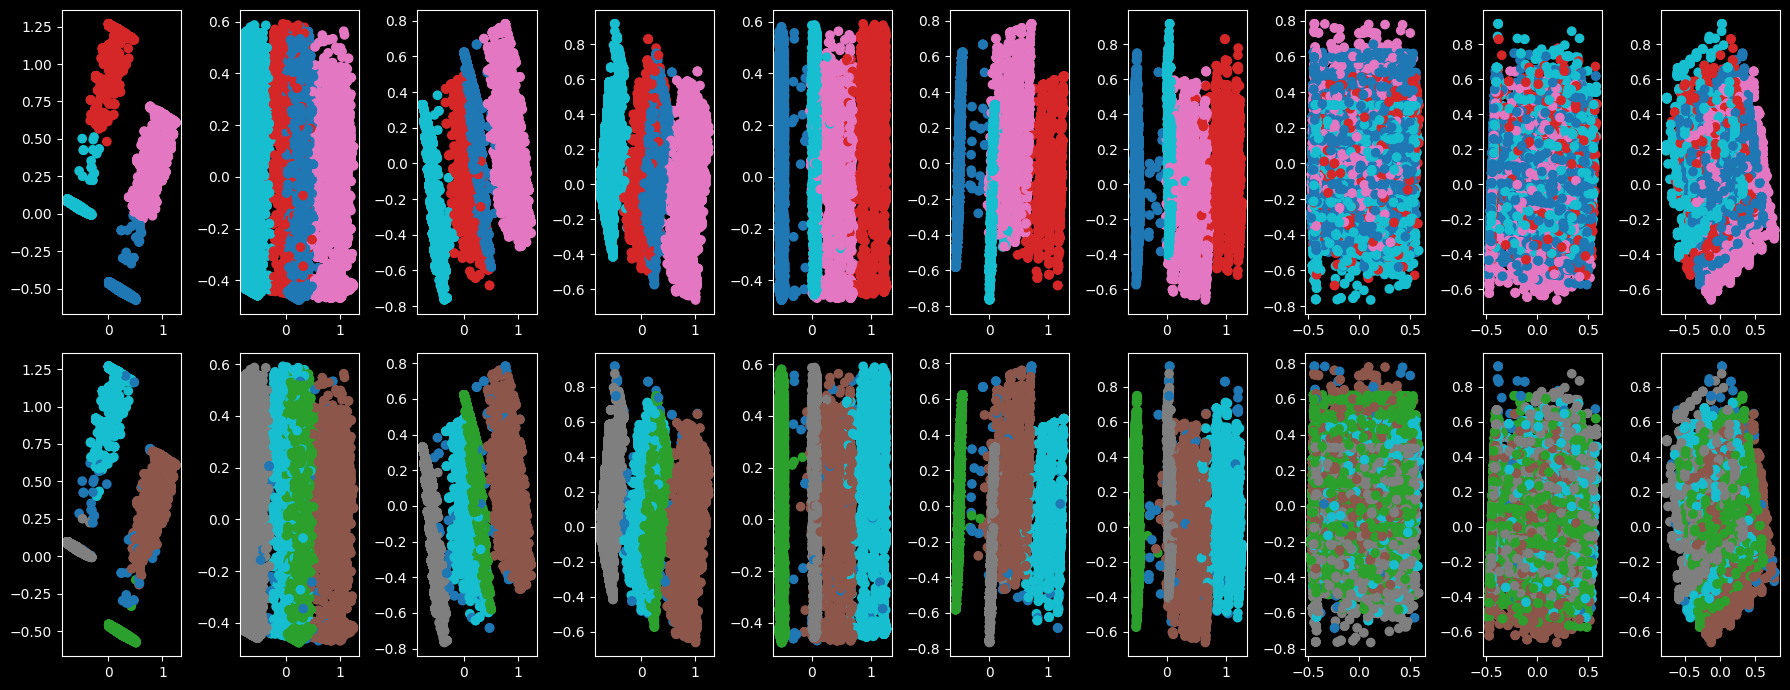

In [976]:
fig, ax = plt.subplots(2, 10, figsize=(18, 7), tight_layout=True)

dbscan_model = DBSCAN(eps=0.23825, min_samples=12).fit(X)
kmeans_model = kmeans_fits[2]

for j, combo in enumerate(combos):
    ax[0][j].scatter(X[:, combo[0]], X[:, combo[1]], c=kmeans_model.labels_, cmap='tab10')

for j, combo in enumerate(combos):
    ax[1][j].scatter(X[:, combo[0]], X[:, combo[1]], c=dbscan_model.labels_, cmap='tab10')

plt.savefig('kmeans_dbscan_res.png')

#### DBSCAN agrees with KMeans about 4 clusters being the best (DBSCAN'S 5fth cluster is noise)

### I'll add the KMeans with k=4 model's labels to the X for predictions as well as DBSCAN model's clusters

In [977]:
kmeans_fits[2].labels_.shape

(15327,)

In [978]:
dbscan_model.labels_.shape

(15327,)

In [979]:
feats = corr_based_feats
feats

['duration', 'month', 'previous', 'housing', 'pdays', 'job']

In [980]:
df[feats].head()

,duration,month,previous,housing,pdays,job
8802,0.645299,0.363636,0.0,1.0,0.000000,0.5
32737,0.744317,0.636364,1.0,1.0,0.573141,1.0
1894,0.214277,0.000000,0.0,0.0,0.000000,0.7
22506,0.144382,0.454545,0.0,1.0,0.000000,0.7
31003,1.000000,0.636364,0.0,0.0,0.000000,0.2


In [981]:
feats_v2 = list(feats)
feats_v2.append('cluster_kmeans')
feats_v2.append('cluster_dbscan')

df_v2 = pd.DataFrame(df)
df_v2['cluster_kmeans'] = kmeans_fits[0].labels_
df_v2['cluster_dbscan'] = dbscan_model.labels_
df_v2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_kmeans,cluster_dbscan
8802,0.298701,0.5,0.0,0.5,1.0,0.279577,1.0,1.0,0.0,0.133333,0.363636,0.645299,0.000000,0.000000,0.0,1.0,0,1,0
32737,0.129870,1.0,1.0,1.0,1.0,0.777809,1.0,1.0,1.0,0.966667,0.636364,0.744317,0.000000,0.573141,1.0,1.0,1,1,1
1894,0.168831,0.7,1.0,1.0,1.0,0.375808,0.0,1.0,1.0,0.266667,0.000000,0.214277,0.205683,0.000000,0.0,0.0,0,0,2
22506,0.246753,0.7,0.0,0.5,1.0,0.285817,1.0,1.0,0.0,0.900000,0.454545,0.144382,1.000000,0.000000,0.0,1.0,0,1,0
31003,0.402597,0.2,0.0,0.5,1.0,0.673039,0.0,1.0,1.0,0.500000,0.636364,1.000000,0.000000,0.000000,0.0,1.0,1,0,2


In [982]:
X_v2 = df_v2[feats_v2].values
print(f'{X_v2.shape=}')

pca = PCA(n_components=6)
X_embed_v2 = pca.fit_transform(X_v2)

print(f'{X_embed_v2.shape=}')

print(f'{np.sum(pca.explained_variance_ratio_[:6])}')

X_v2.shape=(15327, 8)
X_embed_v2.shape=(15327, 6)
0.9937171278428346


In [983]:
X_v2 = X_embed_v2
X = X_v2

## Moving to predictions

#### Creating a Logistic Regression model

In [984]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X[ix_train], y[ix_train])

y_pred_log_reg = log_reg.predict(X[ix_test])

log_reg.score(X[ix_test], y[ix_test])

0.8147826086956522

In [985]:
from sklearn.metrics import classification_report

print(classification_report(y[ix_test], y_pred_log_reg, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.83      0.79      0.81      1147
         yes       0.80      0.84      0.82      1153

    accuracy                           0.81      2300
   macro avg       0.82      0.81      0.81      2300
weighted avg       0.82      0.81      0.81      2300



#### Creating a Decision Tree model

In [986]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=42).fit(
    X[ix_train], 
    y[ix_train]
)

y_pred_dt = clf.predict(X_v2[ix_test])

clf.score(X[ix_test], y[ix_test])

0.8330434782608696

In [987]:
print(classification_report(y[ix_test], y_pred_dt, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.85      0.81      0.83      1147
         yes       0.82      0.86      0.84      1153

    accuracy                           0.83      2300
   macro avg       0.83      0.83      0.83      2300
weighted avg       0.83      0.83      0.83      2300



#### Creating a Random Forest model

In [988]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=50, criterion='gini', max_depth=5, random_state=42
).fit(
    X[ix_train], 
    y[ix_train]
)

y_pred_rf = rf.predict(X[ix_test])

rf.score(X[ix_test], y[ix_test])

0.8469565217391304

In [989]:
print(classification_report(y[ix_test], y_pred_rf, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.87      0.81      0.84      1147
         yes       0.83      0.88      0.85      1153

    accuracy                           0.85      2300
   macro avg       0.85      0.85      0.85      2300
weighted avg       0.85      0.85      0.85      2300



#### Creating a GaussianNB


In [990]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X[ix_train], y[ix_train])

y_pred_gnb = gnb.predict(X[ix_test])

gnb.score(X[ix_test], y[ix_test])

0.8030434782608695

In [991]:
print(classification_report(y[ix_test], y_pred_gnb, target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.80      0.80      0.80      1147
         yes       0.80      0.80      0.80      1153

    accuracy                           0.80      2300
   macro avg       0.80      0.80      0.80      2300
weighted avg       0.80      0.80      0.80      2300



### Comparing Models
- #### Using Confusion Matrix

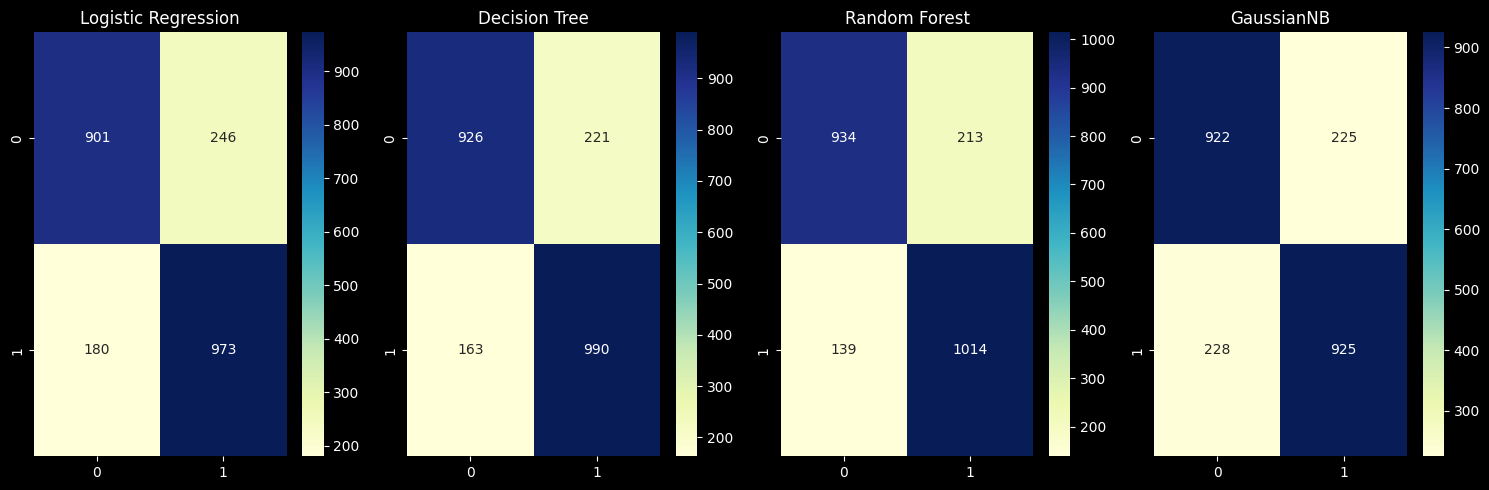

In [992]:
from sklearn import metrics

fig, ax = plt.subplots(1, 4, figsize=(15, 5), tight_layout=True)

class_names = [0, 1]
tick_marks = np.arange(len(class_names))

ax_flat = ax.flatten()

for ax_i in ax_flat:
    ax_i.set_xticks(tick_marks, class_names)
    ax_i.set_yticks(tick_marks, class_names)
    ax_i.xaxis.set_label_position('top')
    ax_i.set_ylabel('Actual label')
    ax_i.set_xlabel('Predicted label')

ax[0].set_title('Logistic Regression')
ax[1].set_title('Decision Tree')
ax[2].set_title('Random Forest')
ax[3].set_title('GaussianNB')

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_log_reg)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[0])

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_dt)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[1])

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_rf)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[2])

cnf_matrix = metrics.confusion_matrix(y[ix_test], y_pred_gnb)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', ax=ax[3])

plt.savefig('conf_mat.png')

- #### Using ROC/AUC curves (instead of Precision/Recall curves since the numbers of observations for each class are equal)

In [993]:
from sklearn.metrics import roc_curve


def plot_roc_auc_curve(ax, model, X, y, linestyle, line_color, model_type):
    
    model_probs = model.predict_proba(X)   # model's probabilities
    model_probs = model_probs[:, 1]     # keeping probs only for the positive outcome
    model_fpr, model_tpr, _ = roc_curve(y, model_probs)

    ax.plot(model_fpr, model_tpr, linestyle=linestyle, color=line_color, label=model_type)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')

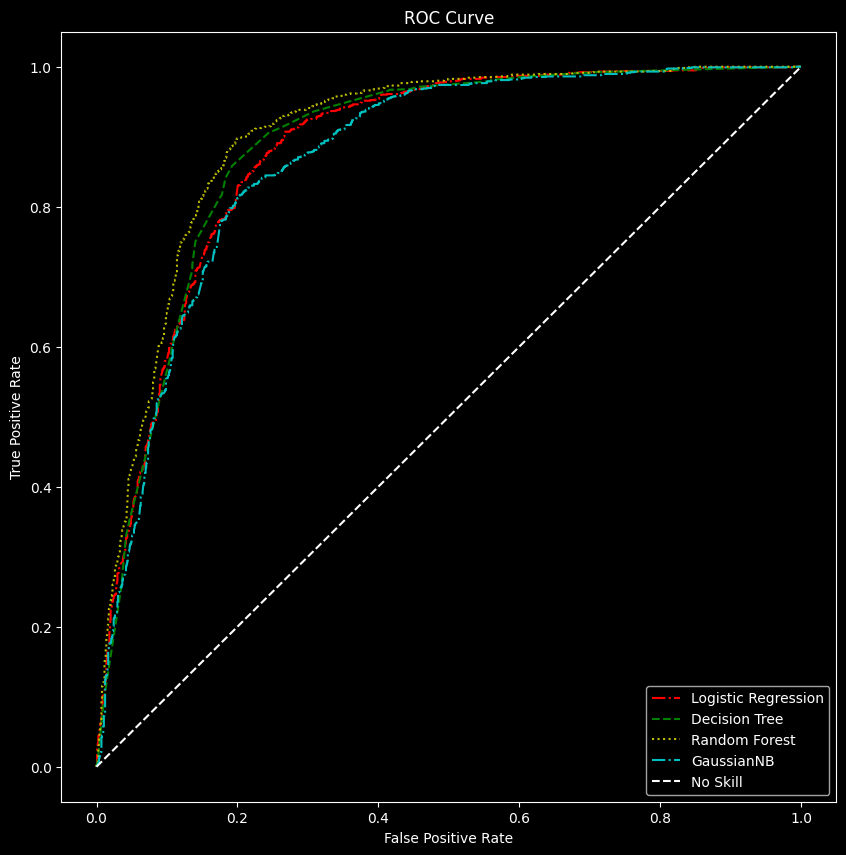

In [994]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_roc_auc_curve(ax, log_reg, X[ix_test], y[ix_test], '-.', 'r', 'Logistic Regression')
plot_roc_auc_curve(ax, clf, X[ix_test], y[ix_test], '--', 'g', 'Decision Tree')
plot_roc_auc_curve(ax, rf, X[ix_test], y[ix_test], ':', 'y', 'Random Forest')
plot_roc_auc_curve(ax, gnb, X[ix_test], y[ix_test], '-.', 'c', 'GaussianNB')

ns_probs = [0 for _ in range(len(y[ix_test]))]   # no skill probabilities
ns_fpr, ns_tpr, _ = roc_curve(y[ix_test], ns_probs)

ax.plot(ns_fpr, ns_tpr, linestyle='--', color='white', label='No Skill')
ax.legend()
ax.set_title('ROC Curve')

plt.savefig('roc_auc.png')
plt.show()

## Neural Nets

In [996]:
X.shape, y.shape

((15327, 6), (15327,))

In [1012]:
import tensorflow as tf
from tensorflow import keras

seq_model = keras.Sequential(
    [
          keras.layers.Input(shape=(6,)),
          keras.layers.Dense(units=720, activation="relu"),
          keras.layers.Dense(units=510, activation="relu"),
          keras.layers.Dense(units=254, activation="relu"),
          keras.layers.Dense(units=128, activation="relu"),
          keras.layers.Dense(units=64, activation="relu"),
          keras.layers.Dense(units=16, activation="relu"),
          keras.layers.Dense(units=2, activation="sigmoid"),
    ], name='Seq1'
)

seq_model.summary()

Model: "Seq1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_333 (Dense)           (None, 720)               5040      
                                                                 
 dense_334 (Dense)           (None, 510)               367710    
                                                                 
 dense_335 (Dense)           (None, 254)               129794    
                                                                 
 dense_336 (Dense)           (None, 128)               32640     
                                                                 
 dense_337 (Dense)           (None, 64)                8256      
                                                                 
 dense_338 (Dense)           (None, 16)                1040      
                                                                 
 dense_339 (Dense)           (None, 2)                 34     

In [1004]:
y_onehot = pd.get_dummies(pd.Series(y)).values

In [1005]:
X[ix_train].shape, y_onehot[ix_train].shape

((10728, 6), (10728, 2))

In [1006]:
X[ix_dev].shape, y_onehot[ix_dev].shape

((2299, 6), (2299, 2))

In [1013]:
from keras import backend as k_back

optimizer = keras.optimizers.Adam(learning_rate=0.005)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], epochs=10, batch_size=128, validation_data=(X[ix_dev], y_onehot[ix_dev]), callbacks=[callback])

seq_model_hist

Epoch 1/10
84/84 [==============================] - 5s 19ms/step - loss: 0.4614 - accuracy: 0.7953 - val_loss: 0.4399 - val_accuracy: 0.8043
Epoch 2/10
84/84 [==============================] - 1s 14ms/step - loss: 0.4238 - accuracy: 0.8146 - val_loss: 0.4134 - val_accuracy: 0.8195
Epoch 3/10
84/84 [==============================] - 1s 16ms/step - loss: 0.4233 - accuracy: 0.8187 - val_loss: 0.4134 - val_accuracy: 0.8177
Epoch 4/10
84/84 [==============================] - 1s 15ms/step - loss: 0.4153 - accuracy: 0.8177 - val_loss: 0.4498 - val_accuracy: 0.8234
Epoch 5/10
84/84 [==============================] - 1s 16ms/step - loss: 0.4151 - accuracy: 0.8217 - val_loss: 0.4181 - val_accuracy: 0.8278


In [1014]:
k_back.set_value(seq_model.optimizer.learning_rate, 0.001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], initial_epoch=10, epochs=50, batch_size=64, validation_data=(X[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist

Epoch 11/50
168/168 [==============================] - 3s 18ms/step - loss: 0.4013 - accuracy: 0.8283 - val_loss: 0.4090 - val_accuracy: 0.8273
Epoch 12/50
168/168 [==============================] - 3s 19ms/step - loss: 0.3965 - accuracy: 0.8307 - val_loss: 0.4066 - val_accuracy: 0.8282
Epoch 13/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3965 - accuracy: 0.8291 - val_loss: 0.4053 - val_accuracy: 0.8256
Epoch 14/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3929 - accuracy: 0.8351 - val_loss: 0.4019 - val_accuracy: 0.8308
Epoch 15/50
168/168 [==============================] - 2s 15ms/step - loss: 0.3925 - accuracy: 0.8345 - val_loss: 0.4079 - val_accuracy: 0.8264
Epoch 16/50
168/168 [==============================] - 3s 18ms/step - loss: 0.3893 - accuracy: 0.8383 - val_loss: 0.4010 - val_accuracy: 0.8260
Epoch 17/50
168/168 [==============================] - 3s 17ms/step - loss: 0.3887 - accuracy: 0.8361 - val_loss: 0.4087 - val_accuracy:

In [1015]:
k_back.set_value(seq_model.optimizer.learning_rate, 0.0001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

seq_model_hist = seq_model.fit(X[ix_train], y_onehot[ix_train], epochs=30, validation_data=(X[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist

Epoch 1/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3732 - accuracy: 0.8434 - val_loss: 0.4014 - val_accuracy: 0.8295
Epoch 2/30
336/336 [==============================] - 5s 14ms/step - loss: 0.3706 - accuracy: 0.8456 - val_loss: 0.3998 - val_accuracy: 0.8308
Epoch 3/30
336/336 [==============================] - 4s 12ms/step - loss: 0.3691 - accuracy: 0.8454 - val_loss: 0.4014 - val_accuracy: 0.8304
Epoch 4/30
336/336 [==============================] - 5s 14ms/step - loss: 0.3678 - accuracy: 0.8462 - val_loss: 0.4019 - val_accuracy: 0.8308


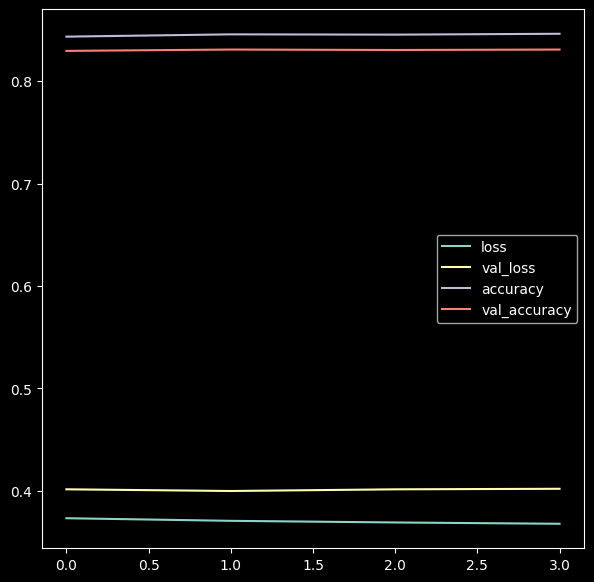

In [1016]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

pd.DataFrame({
    'loss': seq_model_hist.history['loss'], 
    'val_loss': seq_model_hist.history['val_loss'],
    'accuracy': seq_model_hist.history['accuracy'],
    'val_accuracy': seq_model_hist.history['val_accuracy']
    }).plot(ax=ax)

ax.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])

In [1017]:
y_pred_nt = seq_model.predict(X_v2[ix_test])

72/72 [==============================] - 0s 4ms/step


In [1018]:
y_pred_nt

array([[2.117e-01, 7.871e-01],
       [9.996e-01, 3.688e-04],
       [9.222e-01, 7.762e-02],
       ...,
       [1.366e-01, 8.623e-01],
       [1.870e-01, 8.127e-01],
       [8.726e-02, 9.123e-01]], dtype=float32)

In [1019]:
np.argmax(y_pred_nt, axis=1)

array([1, 0, 0, ..., 1, 1, 1])

In [1020]:
print(classification_report(y[ix_test], np.argmax(y_pred_nt, axis=1), target_names=['no', 'yes']))

              precision    recall  f1-score   support

          no       0.86      0.83      0.84      1147
         yes       0.83      0.87      0.85      1153

    accuracy                           0.85      2300
   macro avg       0.85      0.85      0.85      2300
weighted avg       0.85      0.85      0.85      2300



In [1022]:
seq_model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.4019331>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.830796>}

### Creating 2 other neural networks with the same structure but different feats

In [1023]:
def get_kmeans_model(X, k_range=range(2, 6)):
    K = k_range
    kmeans_fits = []

    for k in K:
        model = KMeans(n_clusters=k, init='k-means++', algorithm='elkan').fit(X)
        kmeans_fits.append( (model, k, silhouette_score(X, model.labels_, metric='euclidean')) )
    
    return sorted(kmeans_fits, key=lambda x : x[2], reverse=True)[0][0]

In [1024]:
def get_X_embed(feats_cpy, X, n_components=6):
    feats_cpy.append('cluster_kmeans')

    df_other = pd.DataFrame(df.drop('cluster_dbscan', axis=1))
    df_other['cluster_kmeans'] = get_kmeans_model(X).labels_
        
    return pca_transform(n_components, X)

In [1025]:
X_2 = df[rfe_based_feats].values
X_3 = df[etc_based_feats].values

(X_2_embed, X_2_evr) = get_X_embed(rfe_based_feats.copy(), X_2)
(X_3_embed, X_3_evr) = get_X_embed(etc_based_feats.copy(), X_3)

print(f'{X_2_evr=}\n{X_3_evr=}')

X_2_evr=1.0000000000000002
X_3_evr=1.0


In [1026]:
X_2_embed.shape, X_3_embed.shape

((15327, 6), (15327, 6))

### Testing with RFE based feats

In [1027]:
seq_model_2 = keras.Sequential(
    [
          keras.layers.Input(shape=(6,)),
          keras.layers.Dense(units=720, activation="relu"),
          keras.layers.Dense(units=510, activation="relu"),
          keras.layers.Dense(units=254, activation="relu"),
          keras.layers.Dense(units=128, activation="relu"),
          keras.layers.Dense(units=64, activation="relu"),
          keras.layers.Dense(units=16, activation="relu"),
          keras.layers.Dense(units=2, activation="sigmoid"),
    ], name='Seq2'
)

In [1028]:
optimizer_2 = keras.optimizers.Adam(learning_rate=0.01)

seq_model_2.compile(optimizer=optimizer_2, loss='binary_crossentropy', metrics=['accuracy'])

seq_model_hist_2 = seq_model_2.fit(X_2_embed[ix_train], y_onehot[ix_train], epochs=20, batch_size=128, validation_data=(X_2_embed[ix_dev], y_onehot[ix_dev]))

seq_model_hist_2

Epoch 1/20
84/84 [==============================] - 6s 22ms/step - loss: 0.6631 - accuracy: 0.6120 - val_loss: 0.6503 - val_accuracy: 0.6246
Epoch 2/20
84/84 [==============================] - 1s 14ms/step - loss: 0.6594 - accuracy: 0.6226 - val_loss: 0.6514 - val_accuracy: 0.6281
Epoch 3/20
84/84 [==============================] - 1s 16ms/step - loss: 0.6527 - accuracy: 0.6195 - val_loss: 0.6549 - val_accuracy: 0.6142
Epoch 4/20
84/84 [==============================] - 1s 16ms/step - loss: 0.6588 - accuracy: 0.6157 - val_loss: 0.6552 - val_accuracy: 0.6111
Epoch 5/20
84/84 [==============================] - 1s 14ms/step - loss: 0.6497 - accuracy: 0.6246 - val_loss: 0.6521 - val_accuracy: 0.6168
Epoch 6/20
84/84 [==============================] - 1s 16ms/step - loss: 0.6510 - accuracy: 0.6205 - val_loss: 0.6522 - val_accuracy: 0.6255
Epoch 7/20
84/84 [==============================] - 2s 24ms/step - loss: 0.6500 - accuracy: 0.6212 - val_loss: 0.6533 - val_accuracy: 0.6303
Epoch 8/20
84

### Testing ExtaTreesClassifier based feats

In [1029]:
seq_model_3 = keras.Sequential(
    [
          keras.layers.Input(shape=(6,)),
          keras.layers.Dense(units=720, activation="relu"),
          keras.layers.Dense(units=510, activation="relu"),
          keras.layers.Dense(units=254, activation="relu"),
          keras.layers.Dense(units=128, activation="relu"),
          keras.layers.Dense(units=64, activation="relu"),
          keras.layers.Dense(units=16, activation="relu"),
          keras.layers.Dense(units=2, activation="sigmoid"),
    ], name='Seq3'
)

optimizer_3 = keras.optimizers.Adam(learning_rate=0.01)

seq_model_3.compile(optimizer=optimizer_3, loss='binary_crossentropy', metrics=['accuracy'])

seq_model_hist_3 = seq_model_3.fit(X_3_embed[ix_train], y_onehot[ix_train], epochs=20, batch_size=128, validation_data=(X_3_embed[ix_dev], y_onehot[ix_dev]))

seq_model_hist_3

Epoch 1/20
84/84 [==============================] - 6s 18ms/step - loss: 0.4483 - accuracy: 0.7991 - val_loss: 0.4256 - val_accuracy: 0.8108
Epoch 2/20
84/84 [==============================] - 1s 15ms/step - loss: 0.4196 - accuracy: 0.8160 - val_loss: 0.4158 - val_accuracy: 0.8238
Epoch 3/20
84/84 [==============================] - 2s 28ms/step - loss: 0.4225 - accuracy: 0.8195 - val_loss: 0.4170 - val_accuracy: 0.8230
Epoch 4/20
84/84 [==============================] - 1s 15ms/step - loss: 0.4086 - accuracy: 0.8213 - val_loss: 0.4064 - val_accuracy: 0.8269
Epoch 5/20
84/84 [==============================] - 1s 16ms/step - loss: 0.4046 - accuracy: 0.8257 - val_loss: 0.4024 - val_accuracy: 0.8256
Epoch 6/20
84/84 [==============================] - 2s 26ms/step - loss: 0.4035 - accuracy: 0.8260 - val_loss: 0.4010 - val_accuracy: 0.8291
Epoch 7/20
84/84 [==============================] - 2s 22ms/step - loss: 0.4024 - accuracy: 0.8276 - val_loss: 0.3966 - val_accuracy: 0.8299
Epoch 8/20
84

In [1030]:
k_back.set_value(seq_model_3.optimizer.learning_rate, 0.001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model_hist_3 = seq_model_3.fit(X_3_embed[ix_train], y_onehot[ix_train], initial_epoch=20, epochs=50, batch_size=64, validation_data=(X_3_embed[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist_3

Epoch 21/50
168/168 [==============================] - 2s 14ms/step - loss: 0.3699 - accuracy: 0.8382 - val_loss: 0.3854 - val_accuracy: 0.8351
Epoch 22/50
168/168 [==============================] - 3s 15ms/step - loss: 0.3654 - accuracy: 0.8423 - val_loss: 0.3857 - val_accuracy: 0.8343
Epoch 23/50
168/168 [==============================] - 2s 13ms/step - loss: 0.3638 - accuracy: 0.8425 - val_loss: 0.3861 - val_accuracy: 0.8312
Epoch 24/50
168/168 [==============================] - 3s 15ms/step - loss: 0.3618 - accuracy: 0.8435 - val_loss: 0.3864 - val_accuracy: 0.8321


In [1031]:
seq_model_report =    classification_report(y[ix_test], seq_model.predict(X[ix_test]).argmax(axis=1))
seq_model_2_report =  classification_report(y[ix_test], seq_model_2.predict(X_2_embed[ix_test]).argmax(axis=1))
seq_model_3_report =  classification_report(y[ix_test], seq_model_3.predict(X_3_embed[ix_test]).argmax(axis=1))

print('Seq1')
print(seq_model_report)
print('Seq2')
print(seq_model_2_report)
print('Seq3')
print(seq_model_3_report)

 1/72 [..............................] - ETA: 3s

72/72 [==============================] - 0s 3ms/step
Seq1
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1147
           1       0.83      0.87      0.85      1153

    accuracy                           0.85      2300
   macro avg       0.85      0.85      0.85      2300
weighted avg       0.85      0.85      0.85      2300

Seq2
              precision    recall  f1-score   support

           0       0.60      0.73      0.66      1147
           1       0.65      0.51      0.57      1153

    accuracy                           0.62      2300
   macro avg       0.63      0.62      0.62      2300
weighted avg       0.63      0.62      0.61      2300

Seq3
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1147
           1       0.84      0.87      0.86      1153

    accuracy                           0.85      2300
   macro avg       0.85      0.85      0.85      2300
weight

## Transfer Learning
#### I'll train another neural network with feats=etc_based_feats (X_3_embed) with seq_model as the base (the first one)

In [1034]:
X.shape, X_3_embed.shape

((15327, 6), (15327, 6))

In [1035]:
seq_model.trainable = False

In [1036]:
seq_model_new = keras.Sequential( [keras.Input(shape=(6,)) ] )

for layer in seq_model.layers[:3]:
    seq_model_new.add(layer)

seq_model_new.add(keras.layers.Dense(units=128, activation="relu"))
seq_model_new.add(keras.layers.Dense(units=64, activation="relu"))
seq_model_new.add(keras.layers.Dense(units=16, activation="relu"))
seq_model_new.add(keras.layers.Dense(units=2, activation='sigmoid'))

seq_model_new.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_333 (Dense)           (None, 720)               5040      
                                                                 
 dense_334 (Dense)           (None, 510)               367710    
                                                                 
 dense_335 (Dense)           (None, 254)               129794    
                                                                 
 dense_354 (Dense)           (None, 128)               32640     
                                                                 
 dense_355 (Dense)           (None, 64)                8256      
                                                                 
 dense_356 (Dense)           (None, 16)                1040      
                                                                 
 dense_357 (Dense)           (None, 2)               

In [1037]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model_new.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

seq_model_new_hist = seq_model_new.fit(X_3_embed[ix_train], y_onehot[ix_train], epochs=20, batch_size=128, validation_data=(X_3_embed[ix_dev], y_onehot[ix_dev]), callbacks=callback)

seq_model_new_hist

Epoch 1/20
84/84 [==============================] - 5s 14ms/step - loss: 0.5958 - accuracy: 0.7315 - val_loss: 0.4877 - val_accuracy: 0.7951
Epoch 2/20
84/84 [==============================] - 1s 13ms/step - loss: 0.4739 - accuracy: 0.7953 - val_loss: 0.4606 - val_accuracy: 0.8095
Epoch 3/20
84/84 [==============================] - 1s 14ms/step - loss: 0.4458 - accuracy: 0.8082 - val_loss: 0.4451 - val_accuracy: 0.8003
Epoch 4/20
84/84 [==============================] - 1s 12ms/step - loss: 0.4362 - accuracy: 0.8104 - val_loss: 0.4331 - val_accuracy: 0.8156
Epoch 5/20
84/84 [==============================] - 1s 13ms/step - loss: 0.4284 - accuracy: 0.8118 - val_loss: 0.4284 - val_accuracy: 0.8221
Epoch 6/20
84/84 [==============================] - 1s 15ms/step - loss: 0.4237 - accuracy: 0.8161 - val_loss: 0.4199 - val_accuracy: 0.8208
Epoch 7/20
84/84 [==============================] - 1s 15ms/step - loss: 0.4176 - accuracy: 0.8199 - val_loss: 0.4179 - val_accuracy: 0.8151
Epoch 8/20
84

In [1038]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

seq_model_hist_new = seq_model_new.fit(X_3_embed[ix_train], y_onehot[ix_train], initial_epoch=20, epochs=50, batch_size=64, validation_data=(X_3_embed[ix_dev], y_onehot[ix_dev]), callbacks=[callback])
seq_model_hist_new

Epoch 21/50
  1/168 [..............................] - ETA: 1s - loss: 0.3673 - accuracy: 0.8750

168/168 [==============================] - 2s 11ms/step - loss: 0.4134 - accuracy: 0.8231 - val_loss: 0.4306 - val_accuracy: 0.8134
Epoch 22/50
168/168 [==============================] - 2s 10ms/step - loss: 0.4146 - accuracy: 0.8232 - val_loss: 0.4251 - val_accuracy: 0.8169
Epoch 23/50
168/168 [==============================] - 2s 10ms/step - loss: 0.4104 - accuracy: 0.8218 - val_loss: 0.4144 - val_accuracy: 0.8182
Epoch 24/50
168/168 [==============================] - 2s 11ms/step - loss: 0.4060 - accuracy: 0.8267 - val_loss: 0.4166 - val_accuracy: 0.8208
Epoch 25/50
168/168 [==============================] - 2s 12ms/step - loss: 0.4055 - accuracy: 0.8239 - val_loss: 0.4123 - val_accuracy: 0.8234
Epoch 26/50
168/168 [==============================] - 2s 11ms/step - loss: 0.4034 - accuracy: 0.8263 - val_loss: 0.4249 - val_accuracy: 0.8099
Epoch 27/50
168/168 [==============================] - 2s 10ms/step - loss: 0.4034 - accuracy: 0.8241 - val_loss: 0.4104 - val_accuracy: 0.8212
Epoc

In [1039]:
print(classification_report(y[ix_test], seq_model_new.predict(X_3_embed[ix_test]).argmax(axis=1)))

72/72 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1147
           1       0.80      0.91      0.85      1153

    accuracy                           0.84      2300
   macro avg       0.85      0.84      0.84      2300
weighted avg       0.85      0.84      0.84      2300



In [1048]:
stats = pd.DataFrame(
    index=['Seq1', 'Seq2', 'Seq3', 'SeqNew'], 
    columns=['accuracy', 'val_loss'], 
    data={
        'accuracy': [
            float(seq_model.get_metrics_result()['accuracy']), 
            float(seq_model_2.get_metrics_result()['accuracy']), 
            float(seq_model_3.get_metrics_result()['accuracy']),
            float(seq_model_new.get_metrics_result()['accuracy'])
        ],
        'val_loss': [
            float(seq_model.get_metrics_result()['loss']), 
            float(seq_model_2.get_metrics_result()['loss']), 
            float(seq_model_3.get_metrics_result()['loss']),
            float(seq_model_new.get_metrics_result()['loss'])            
        ]
    })

stats.sort_values('val_loss')

,accuracy,val_loss
Seq3,0.832101,0.386383
Seq1,0.830796,0.401933
SeqNew,0.816442,0.416745
Seq2,0.613745,0.658280
